In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
df = spark.read.csv('./master.csv', header=True, inferSchema=True)

In [3]:
print((df.count(), len(df.columns)))

(27820, 12)


In [4]:

df.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [5]:
df.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

In [6]:

df.describe().show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+------------------+------------------+----------+
|summary|   country|              year|   sex|        age|       suicides_no|        population| suicides/100k pop|  country-year|       HDI for year| gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+------------------+------------------+----------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|         27820|               8364|             27820|             27820|     27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|          null| 0.7766011477761785|              null|16866.464414090584|      null|


In [7]:

df.printSchema()



root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [8]:
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

pandas_df = df.toPandas()






Defaulting to user installation because normal site-packages is not writeable


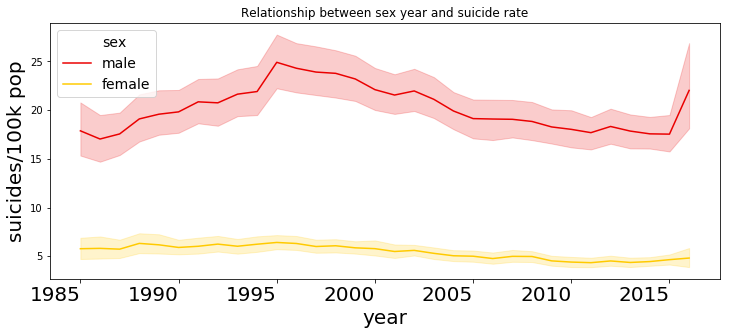

In [9]:
plt.figure(figsize=(12, 16))


plt.subplot(311)
sns.lineplot(x='year', y='suicides/100k pop', hue='sex', data=pandas_df, palette="hot")  
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides/100k pop', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.legend(fontsize=14, loc='best')  
plt.title("Relationship between sex year and suicide rate")
plt.show()

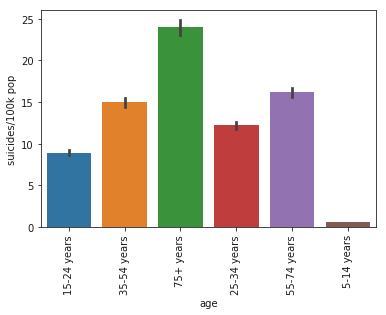

In [10]:
sns.set_color_codes('muted')
sns.barplot(x='age',y='suicides/100k pop',data=pandas_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
from pyspark.sql.functions import isnull, when, count, col

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+----+---+---+-----------+----------+-----------------+------------+------------+------------------+------------------+----------+
|country|year|sex|age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+------------------+------------------+----------+
|      0|   0|  0|  0|          0|         0|                0|           0|       19456|                 0|                 0|         0|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+------------------+------------------+----------+



In [12]:
from pyspark.sql.functions import *

df = df.withColumn(' gdp_for_year ($) ', regexp_replace(' gdp_for_year ($) ', ',', '').cast('float'))
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : float (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [13]:
columns_to_drop = ['country-year', 'suicides_no']
df = df.drop(*columns_to_drop)
df.columns

['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides/100k pop',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [14]:


df=df.withColumn('population of country', df[' gdp_for_year ($) ']/df['gdp_per_capita ($)']) 
df.columns



['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides/100k pop',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation',
 'population of country']

In [15]:



from pyspark.sql.functions import mean


mean_HDI = df.select(mean(df['HDI for year'])).collect()

mean_HDI


mean_HDI[0]



mean_HDI[0][0]
mean_HDI_val = mean_HDI[0][0]

df=df.na.fill(mean_HDI_val,subset=['HDI for year'])




In [16]:
dataset= df.toPandas()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['country']= le.fit_transform(dataset['country'])  
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex']= le.fit_transform(dataset['sex']) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['age']= le.fit_transform(dataset['age']) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['generation']= le.fit_transform(dataset['generation']) 


print(dataset['country'])
print(dataset['sex'])
print(dataset['age'])
print(dataset['generation'])


0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
        ... 
27790    100
27791    100
27792    100
27793    100
27794    100
27795    100
27796    100
27797    100
27798    100
27799    100
27800    100
27801    100
27802    100
27803    100
27804    100
27805    100
27806    100
27807    100
27808    100
27809    100
27810    100
27811    100
27812    100
27813    100
27814    100
27815    100
27816    100
27817    100
27818    100
27819    100
Name: country, Length: 27820, dtype: int64
0        1
1        1
2        0
3        1
4        1
5        0
6        0
7        0
8        1
9        0
10       0
11       1
12       0
13       1
14       1

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit_transform(dataset))

[[-1.67762677 -1.68361541  1.         ... -0.8508637  -0.38781514
  -0.46597752]
 [-1.67762677 -1.68361541  1.         ... -0.8508637   1.26982348
  -0.46597752]
 [-1.67762677 -1.68361541 -1.         ... -0.8508637  -0.38781514
  -0.46597752]
 ...
 [ 1.72697514  1.50451895  1.         ... -0.7707567   0.16473107
   0.124238  ]
 [ 1.72697514  1.50451895 -1.         ... -0.7707567   0.16473107
   0.124238  ]
 [ 1.72697514  1.50451895 -1.         ... -0.7707567  -1.49290756
   0.124238  ]]


In [19]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()
from pyspark.sql.types import *
dataset = spark.createDataFrame(dataset)

type(dataset)

pyspark.sql.dataframe.DataFrame

In [20]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_doc').getOrCreate()


from pyspark.ml.feature import VectorAssembler
featureArray = ['year', 'sex', 'age','population','HDI for year',
 ' gdp_for_year ($) ','gdp_per_capita ($)','country','population of country','generation']
df_assembler = VectorAssembler(inputCols=featureArray, outputCol="feature")

df = df_assembler.transform(dataset)
df.printSchema()

df.select(['feature','suicides/100k pop']).show(10,False)

root
 |-- country: long (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- age: long (nullable = true)
 |-- population: long (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : double (nullable = true)
 |-- gdp_per_capita ($): long (nullable = true)
 |-- generation: long (nullable = true)
 |-- population of country: double (nullable = true)
 |-- feature: vector (nullable = true)

+-------------------------------------------------------------------------------------------+-----------------+
|feature                                                                                    |suicides/100k pop|
+-------------------------------------------------------------------------------------------+-----------------+
|[1987.0,1.0,0.0,312900.0,0.7766011477761785,2.156624896E9,796.0,0.0,2709327.7587939696,2.0]|6.71             |
|[1987.0,1.0,2.0,308000.0,0.7766011477761785,2

In [21]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="suicides/100k pop", featuresCol='feature', numTrees=20)

In [22]:
model_df= rf.fit(df)



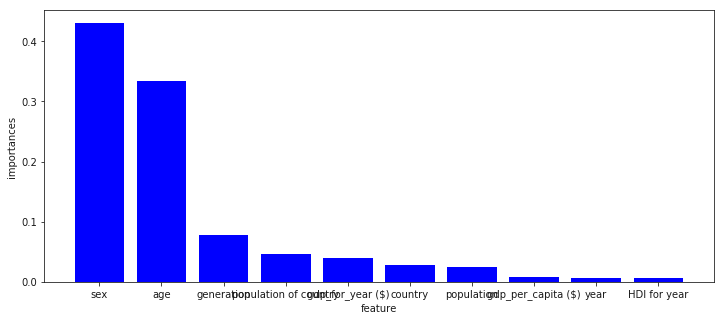

{'generation': 0.0780849949564215, 'population of country': 0.04569729660132662, 'sex': 0.4302993557459326, 'country': 0.027513261010333336, ' gdp_for_year ($) ': 0.03910041587561909, 'population': 0.024155323904226762, 'year': 0.00632705271510361, 'HDI for year': 0.005816163353695813, 'gdp_per_capita ($)': 0.00831296234404036, 'age': 0.3346931734933003}


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
FI = pd.Series(model_df.featureImportances,index=featureArray) # pySpark

FI = FI.sort_values(ascending = False)
fig = plt.figure(figsize=(12,5))
plt.bar(FI.index,FI.values,color="blue")
plt.xlabel('feature')
plt.ylabel('importances')
plt.show()

ff=model_df.featureImportances
importancesList=[float(col) for col in  ff]
colList=featureArray
result=dict(zip(colList,importancesList))
print(result)

In [24]:
columns_to_drop = ['HDI for year']
df = df.drop(*columns_to_drop)
df.columns

['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides/100k pop',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation',
 'population of country',
 'feature']

In [25]:
from pyspark.ml.feature import VectorAssembler
featureArray = ['year', 'sex', 'age','population',' gdp_for_year ($) ',
                'gdp_per_capita ($)','country','population of country']
df_assembler = VectorAssembler(inputCols=featureArray, outputCol="features")

df = df_assembler.transform(df)
df.printSchema()

df.select(['features','suicides/100k pop']).show(10,False)



root
 |-- country: long (nullable = true)
 |-- year: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- age: long (nullable = true)
 |-- population: long (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |--  gdp_for_year ($) : double (nullable = true)
 |-- gdp_per_capita ($): long (nullable = true)
 |-- generation: long (nullable = true)
 |-- population of country: double (nullable = true)
 |-- feature: vector (nullable = true)
 |-- features: vector (nullable = true)

+--------------------------------------------------------------------+-----------------+
|features                                                            |suicides/100k pop|
+--------------------------------------------------------------------+-----------------+
|[1987.0,1.0,0.0,312900.0,2.156624896E9,796.0,0.0,2709327.7587939696]|6.71             |
|[1987.0,1.0,2.0,308000.0,2.156624896E9,796.0,0.0,2709327.7587939696]|5.19             |
|[1987.0,0.0,0.0,289700.0,2.156624896E9,796.0,0.0,270

In [26]:
model_df=df.select(['features','suicides/100k pop'])                                         
train_df,test_df=model_df.randomSplit([0.80,0.20])                                  

train_df.describe().show()
test_df.describe().show()

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|             22210|
|   mean|12.683576316974264|
| stddev|18.787067336001375|
|    min|               0.0|
|    max|            224.97|
+-------+------------------+

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|              5610|
|   mean|13.340748663101564|
| stddev|19.629866443701083|
|    min|               0.0|
|    max|            177.57|
+-------+------------------+



In [27]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="suicides/100k pop", featuresCol='features', numTrees=20)

model_train_rf= rf.fit(train_df)
model_test_rf = rf.fit(test_df)
prediction_train_rf=model_train_rf.transform(train_df)
prediction_test_rf=model_test_rf.transform(test_df)


In [28]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="suicides/100k pop", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction_train_rf)
print("Root Mean Squared Error (RMSE) on train data = %g" % rmse)
rmse1 = evaluator.evaluate(prediction_test_rf)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse1)

Root Mean Squared Error (RMSE) on train data = 14.4952
Root Mean Squared Error (RMSE) on test data = 14.6602


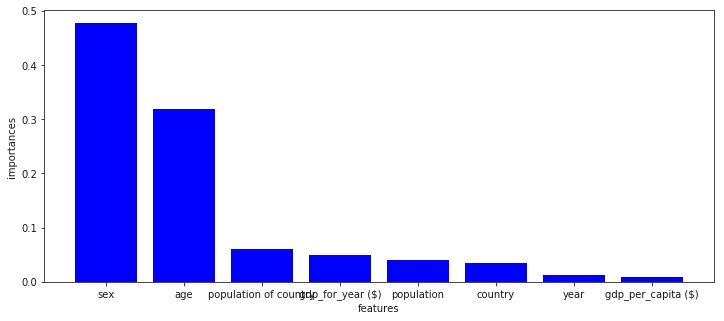

{'sex': 0.4773955650313092, 'country': 0.03407998788430789, ' gdp_for_year ($) ': 0.04879691380746084, 'population': 0.04102604703365639, 'year': 0.01253311553873955, 'population of country': 0.05999678400507384, 'gdp_per_capita ($)': 0.008108898635043446, 'age': 0.31806268806440885}


In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

FI = pd.Series(model_train_rf.featureImportances,index=featureArray) # pySpark

FI = FI.sort_values(ascending = False)
fig = plt.figure(figsize=(12,5))
plt.bar(FI.index,FI.values,color="blue")
plt.xlabel('features')
plt.ylabel('importances')
plt.show()

ff=model_train_rf.featureImportances
importancesList=[float(col) for col in  ff]
colList=featureArray
result=dict(zip(colList,importancesList))
print(result)